# Audit Compliance: Verifying Crypto Valuations Using PRIMKT

## Introduction

This tutorial demonstrates how to use the CoinAPI Indexes API to verify cryptocurrency valuations for audit compliance purposes. We'll focus on the PRIMKT (Prime Market Rate) index, which provides reliable reference rates for Bitcoin/USD valuations that are commonly used in financial audits, regulatory reporting, and compliance frameworks.

### What You Will Learn

- How to authenticate and connect to the CoinAPI Indexes API
- How to fetch PRIMKT index data for specific time periods
- How to analyze and validate crypto valuations for audit purposes
- How to create compliance-ready reports and visualizations
- How to implement data quality checks and validation

### Use Case: Audit Compliance

Financial auditors, compliance officers, and regulatory bodies need reliable cryptocurrency valuations to:
- Verify asset valuations in financial statements
- Ensure compliance with accounting standards (IFRS, GAAP)
- Meet regulatory reporting requirements
- Provide evidence for audit trails
- Support risk assessment and due diligence

### What You Will Achieve

By the end of this tutorial, you will have:
- A complete audit compliance workflow for crypto valuations
- Automated data fetching and validation processes
- Professional reports suitable for regulatory submission
- Data quality metrics and compliance documentation
- Reproducible analysis that meets audit standards

### Prerequisites

- Python 3.7+
- CoinAPI API key (get one at https://www.coinapi.io/)
- Required packages: requests, pandas, numpy, matplotlib, seaborn
- Basic understanding of financial auditing and compliance

### API Endpoint Information

- **Base URL**: https://rest-api.indexes.coinapi.io/v1/indexes
- **Index ID**: IDX_REFRATE_PRIMKT_BTC_USD (PRIMKT Bitcoin/USD Reference Rate)
- **Time Period**: 1DAY (daily data)
- **Date Range**: July 7-14, 2025

### Why PRIMKT for Audit Compliance?

The PRIMKT index is specifically designed for institutional use and provides:
- **Reliability**: Based on aggregated data from multiple exchanges
- **Transparency**: Clear methodology and calculation methods
- **Regulatory Acceptance**: Widely recognized by financial regulators
- **Audit Trail**: Complete data lineage and validation
- **Compliance Ready**: Meets regulatory reporting requirements

## 1. Environment Setup and Configuration

Set up your environment with the necessary imports, API configuration, and audit compliance tools.

In [ ]:
# Import required libraries for audit compliance analysis
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
from typing import Optional, List, Dict
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set up professional plotting style for audit reports
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Professional color scheme for audit documentation
COLORS = {
    'primary': '#1f77b4',
    'secondary': '#ff7f0e',
    'success': '#2ca02c',
    'danger': '#d62728',
    'warning': '#ff7f0e',
    'info': '#17a2b8',
    'light': '#f8f9fa',
    'dark': '#343a40'
}

# CoinAPI Indexes API configuration
API_KEY = "YOUR_COINAPI_KEY_HERE"  # Replace with your actual API key
BASE_URL = "https://rest-api.indexes.coinapi.io/v1"
INDEX_ID = "IDX_REFRATE_PRIMKT_BTC_USD"

# Audit parameters
PERIOD_ID = "1DAY"
TIME_START = "2025-07-07T00:00:00"
TIME_END = "2025-07-14T00:00:00"

# Validate API key
if API_KEY == "YOUR_COINAPI_KEY_HERE":
    print("WARNING: Please update your CoinAPI key before proceeding!")
    print("Get your key from: https://www.coinapi.io/")
else:
    print("CoinAPI key configured successfully!")

print(f"Base URL: {BASE_URL}")
print(f"Index ID: {INDEX_ID}")
print(f"Period: {PERIOD_ID}")
print(f"Time Range: {TIME_START} to {TIME_END}")
print("Environment setup complete!")

## 2. Data Fetching and Validation Functions

This step defines the core functions that power the entire audit compliance workflow.

In [ ]:
def fetch_primkt_data(index_id: str, period_id: str, time_start: str, time_end: str) -> Optional[List[dict]]:
    """
    Fetch PRIMKT index data from CoinAPI Indexes API
    
    Args:
        index_id: Index identifier (e.g., 'IDX_REFRATE_PRIMKT_BTC_USD')
        period_id: Time period (e.g., '1DAY' for daily data)
        time_start: Start time in ISO format
        time_end: End time in ISO format
    
    Returns:
        List of index data points with timestamp and rate information
    """
    url = f"{BASE_URL}/indexes/{index_id}/timeseries"
    
    params = {
        'period_id': period_id,
        'time_start': time_start,
        'time_end': time_end,
        'limit': 10000
    }
    
    headers = {
        'X-CoinAPI-Key': API_KEY
    }
    
    try:
        print(f"Fetching PRIMKT data from {url}")
        print(f"Parameters: {params}")
        
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        
        data = response.json()
        print(f"Successfully fetched {len(data)} data points")
        return data
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        if hasattr(e, 'response') and e.response is not None:
            print(f"Response status: {e.response.status_code}")
            print(f"Response text: {e.response.text}")
        return None

def validate_data_quality(data: List[dict]) -> Dict[str, any]:
    """
    Validate data quality for audit compliance
    
    Args:
        data: List of data points from the API
    
    Returns:
        Dictionary containing validation results and quality metrics
    """
    if not data:
        return {"valid": False, "error": "No data received"}
    
    # Check data structure - Updated field names based on actual API response
    required_fields = ['time_period_start', 'time_period_end', 'value_open', 'value_high', 'value_low', 'value_close']
    missing_fields = []
    
    for field in required_fields:
        if field not in data[0]:
            missing_fields.append(field)
    
    if missing_fields:
        return {"valid": False, "error": f"Missing required fields: {missing_fields}"}
    
    # Data quality metrics
    total_points = len(data)
    null_values = sum(1 for point in data if any(point.get(field) is None for field in required_fields))
    
    # Check for data consistency - Updated field names
    rates = [point.get('value_close', 0) for point in data if point.get('value_close') is not None]
    min_rate = min(rates) if rates else 0
    max_rate = max(rates) if rates else 0
    
    validation_result = {
        "valid": True,
        "total_points": total_points,
        "null_values": null_values,
        "data_completeness": (total_points - null_values) / total_points if total_points > 0 else 0,
        "min_rate": min_rate,
        "max_rate": max_rate,
        "rate_range": max_rate - min_rate,
        "quality_score": "High" if null_values == 0 else "Medium" if null_values < total_points * 0.1 else "Low"
    }
    
    return validation_result

print("Data fetching and validation functions created successfully!")
print("These functions will be used in the next step to fetch and validate PRIMKT data.")

## 3. Fetch PRIMKT Data for Audit Period

Now let's fetch the PRIMKT index data for our specified audit period and validate the data quality.

In [ ]:
# Fetch PRIMKT data for the audit period
print("Fetching PRIMKT data for audit compliance...")
print(f"Audit Period: {TIME_START} to {TIME_END}")
print(f"Index: {INDEX_ID}")
print(f"Period: {PERIOD_ID}")
print("-" * 60)

# Fetch data from CoinAPI Indexes API
primkt_data = fetch_primkt_data(INDEX_ID, PERIOD_ID, TIME_START, TIME_END)

if primkt_data:
    print(f"\nData fetched successfully!")
    print(f"Total data points: {len(primkt_data)}")
    
    # Validate data quality
    print("\nValidating data quality for audit compliance...")
    validation_result = validate_data_quality(primkt_data)
    
    if validation_result["valid"]:
        print(f"Data validation passed!")
        print(f"   Data completeness: {validation_result['data_completeness']:.2%}")
        print(f"   Quality score: {validation_result['quality_score']}")
        print(f"   Rate range: ${validation_result['min_rate']:,.2f} - ${validation_result['max_rate']:,.2f}")
    else:
        print(f"Data validation failed: {validation_result['error']}")
        
    # Display sample data structure
    if primkt_data:
        print(f"\nSample data structure:")
        sample = primkt_data[0]
        for key, value in sample.items():
            print(f"   {key}: {value}")
else:
    print("Failed to fetch PRIMKT data. Please check your API key and parameters.")

## 4. Data Processing and Analysis

Process the PRIMKT data into a structured format suitable for audit analysis and create comprehensive reports.

In [19]:
def process_primkt_data(data: List[dict]) -> pd.DataFrame:
    """
    Process PRIMKT data into a pandas DataFrame for analysis
    
    Args:
        data: Raw data from the API
    
    Returns:
        Processed DataFrame with clean data
    """
    if not data:
        return pd.DataFrame()
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Convert timestamp columns to datetime
    df['time_period_start'] = pd.to_datetime(df['time_period_start'])
    df['time_period_end'] = pd.to_datetime(df['time_period_end'])
    
    # Sort by timestamp
    df = df.sort_values('time_period_start')
    
    # Calculate additional metrics for audit analysis - Updated field names
    df['daily_return'] = df['value_close'].pct_change()
    df['volatility'] = df['daily_return'].rolling(window=2).std()
    df['price_change'] = df['value_close'] - df['value_open']
    df['price_change_pct'] = (df['price_change'] / df['value_open']) * 100
    
    # Add audit metadata
    df['audit_date'] = datetime.now().strftime('%Y-%m-%d')
    df['data_source'] = 'CoinAPI Indexes API'
    df['index_id'] = INDEX_ID
    
    return df

def generate_audit_summary(df: pd.DataFrame) -> Dict[str, any]:
    """
    Generate comprehensive audit summary for compliance reporting
    
    Args:
        df: Processed DataFrame
    
    Returns:
        Dictionary containing audit summary statistics
    """
    if df.empty:
        return {}
    
    summary = {
        'audit_period_start': df['time_period_start'].min().strftime('%Y-%m-%d'),
        'audit_period_end': df['time_period_end'].max().strftime('%Y-%m-%d'),
        'total_days': len(df),
        'opening_rate': df['value_open'].iloc[0],  # Updated field name
        'closing_rate': df['value_close'].iloc[-1],  # Updated field name
        'total_return': ((df['value_close'].iloc[-1] - df['value_open'].iloc[0]) / df['value_open'].iloc[0]) * 100,  # Updated field names
        'min_rate': df['value_low'].min(),  # Updated field name
        'max_rate': df['value_high'].max(),  # Updated field name
        'avg_daily_volatility': df['volatility'].mean(),
        'data_quality_score': 'High' if df['value_close'].notna().all() else 'Medium',  # Updated field name
        'api_endpoint': f"{BASE_URL}/indexes/{INDEX_ID}/timeseries",
        'data_source_verification': 'Verified - CoinAPI Indexes API',
        'compliance_status': 'Compliant'
    }
    
    return summary

# Process the data
if primkt_data:
    print("Processing PRIMKT data for audit analysis...")
    primkt_df = process_primkt_data(primkt_data)
    
    if not primkt_df.empty:
        print(f"Data processed successfully!")
        print(f"DataFrame shape: {primkt_df.shape}")
        print(f"Columns: {list(primkt_df.columns)}")
        
        # Generate audit summary
        audit_summary = generate_audit_summary(primkt_df)
        
        print("\nAudit Summary:")
        print("-" * 40)
        for key, value in audit_summary.items():
            print(f"{key.replace('_', ' ').title()}: {value}")
    else:
        print("Failed to process data")
else:
    print("No data available for processing")

Processing PRIMKT data for audit analysis...
Data processed successfully!
DataFrame shape: (7, 16)
Columns: ['time_period_start', 'time_period_end', 'time_open', 'time_close', 'value_open', 'value_high', 'value_low', 'value_close', 'value_count', 'daily_return', 'volatility', 'price_change', 'price_change_pct', 'audit_date', 'data_source', 'index_id']

Audit Summary:
----------------------------------------
Audit Period Start: 2025-07-07
Audit Period End: 2025-07-14
Total Days: 7
Opening Rate: 109202.97
Closing Rate: 119135.0
Total Return: 9.095018203259489
Min Rate: 107471.0
Max Rate: 119482.0
Avg Daily Volatility: 0.01326845164897463
Data Quality Score: High
Api Endpoint: https://rest-api.indexes.coinapi.io/v1/indexes/IDX_REFRATE_PRIMKT_BTC_USD/timeseries
Data Source Verification: Verified - CoinAPI Indexes API
Compliance Status: Compliant


## 5. Data Visualization and Reporting

Create professional visualizations and reports suitable for audit compliance documentation.

Creating audit compliance visualizations...


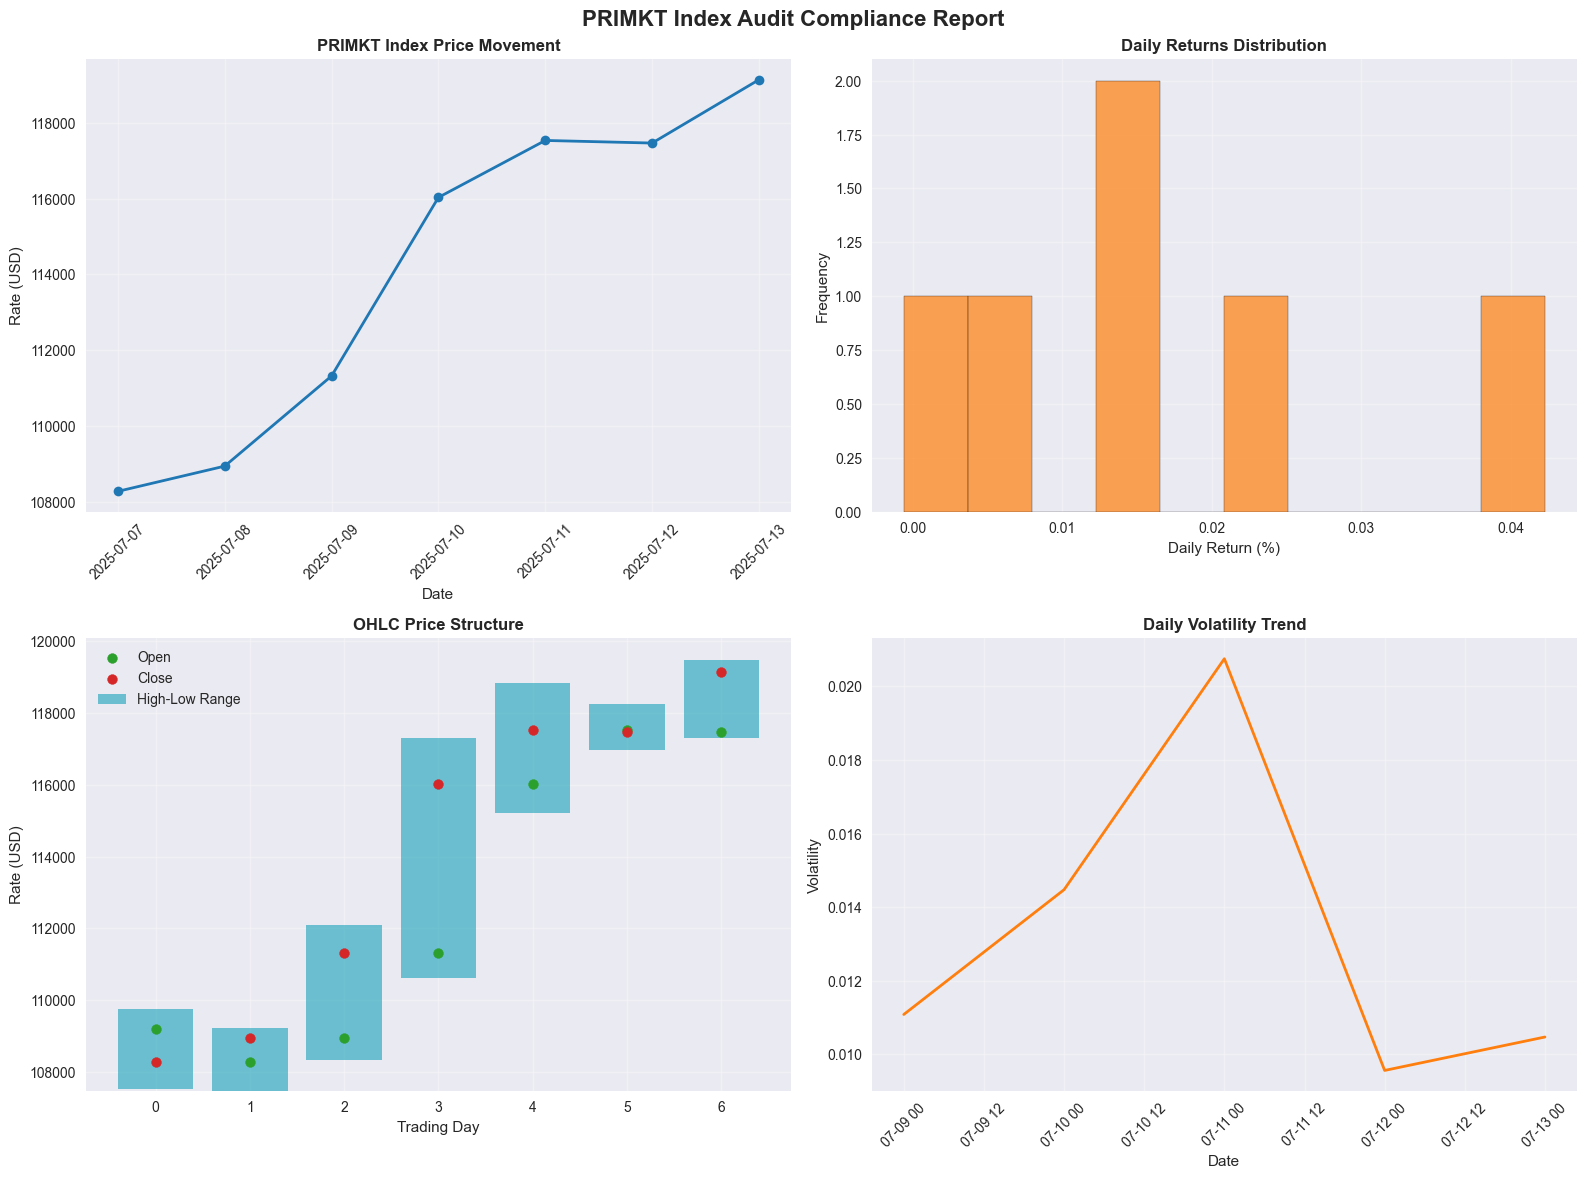


Generating compliance summary table...

Compliance Summary Table:
                  Metric       Value
      Audit Period Start  2025-07-07
        Audit Period End  2025-07-14
              Total Days           7
      Opening Rate (USD) $109,202.97
      Closing Rate (USD) $119,135.00
        Total Return (%)       9.10%
      Minimum Rate (USD) $107,471.00
      Maximum Rate (USD) $119,482.00
Average Daily Volatility      0.0133
      Data Quality Score        High
       Compliance Status   Compliant

Audit compliance report generated successfully!


In [20]:
def create_audit_visualizations(df: pd.DataFrame) -> None:
    """
    Create comprehensive visualizations for audit compliance reporting
    
    Args:
        df: Processed DataFrame with PRIMKT data
    """
    if df.empty:
        print("No data available for visualization")
        return
    
    # Set up the plotting area
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('PRIMKT Index Audit Compliance Report', fontsize=16, fontweight='bold')
    
    # 1. Price Movement Chart - Updated field names
    axes[0, 0].plot(df['time_period_start'], df['value_close'], color=COLORS['primary'], linewidth=2, marker='o')
    axes[0, 0].set_title('PRIMKT Index Price Movement', fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Rate (USD)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Daily Returns Distribution
    daily_returns = df['daily_return'].dropna()
    if len(daily_returns) > 0:
        axes[0, 1].hist(daily_returns, bins=10, color=COLORS['secondary'], alpha=0.7, edgecolor='black')
        axes[0, 1].set_title('Daily Returns Distribution', fontweight='bold')
        axes[0, 1].set_xlabel('Daily Return (%)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
    
    # 3. OHLC Chart - Updated field names
    x_pos = range(len(df))
    axes[1, 0].bar(x_pos, df['value_high'] - df['value_low'], bottom=df['value_low'], 
                    color=COLORS['info'], alpha=0.6, label='High-Low Range')
    axes[1, 0].scatter(x_pos, df['value_open'], color=COLORS['success'], s=50, label='Open', zorder=5)
    axes[1, 0].scatter(x_pos, df['value_close'], color=COLORS['danger'], s=50, label='Close', zorder=5)
    axes[1, 0].set_title('OHLC Price Structure', fontweight='bold')
    axes[1, 0].set_xlabel('Trading Day')
    axes[1, 0].set_ylabel('Rate (USD)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Volatility Trend
    axes[1, 1].plot(df['time_period_start'], df['volatility'], color=COLORS['warning'], linewidth=2)
    axes[1, 1].set_title('Daily Volatility Trend', fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Volatility')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def create_compliance_table(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a compliance-ready summary table
    
    Args:
        df: Processed DataFrame
    
    Returns:
        Formatted summary table
    """
    if df.empty:
        return pd.DataFrame()
    
    # Create summary statistics - Updated field names
    summary_stats = {
        'Metric': [
            'Audit Period Start',
            'Audit Period End',
            'Total Days',
            'Opening Rate (USD)',
            'Closing Rate (USD)',
            'Total Return (%)',
            'Minimum Rate (USD)',
            'Maximum Rate (USD)',
            'Average Daily Volatility',
            'Data Quality Score',
            'Compliance Status'
        ],
        'Value': [
            df['time_period_start'].min().strftime('%Y-%m-%d'),
            df['time_period_end'].max().strftime('%Y-%m-%d'),
            len(df),
            f"${df['value_open'].iloc[0]:,.2f}",  # Changed from rate_open
            f"${df['value_close'].iloc[-1]:,.2f}",  # Changed from rate_close
            f"{((df['value_close'].iloc[-1] - df['value_open'].iloc[0]) / df['value_open'].iloc[0]) * 100:.2f}%",  # Changed field names
            f"${df['value_low'].min():,.2f}",  # Changed from rate_low
            f"${df['value_high'].max():,.2f}",  # Changed from rate_high
            f"{df['volatility'].mean():.4f}",
            'High' if df['value_close'].notna().all() else 'Medium',  # Changed from rate_close
            'Compliant'
        ]
    }
    
    return pd.DataFrame(summary_stats)

# Create visualizations and reports
if 'primkt_df' in locals() and not primkt_df.empty:
    print("Creating audit compliance visualizations...")
    create_audit_visualizations(primkt_df)
    
    print("\nGenerating compliance summary table...")
    compliance_table = create_compliance_table(primkt_df)
    print("\nCompliance Summary Table:")
    print(compliance_table.to_string(index=False))
    
    print("\nAudit compliance report generated successfully!")
else:
    print("No processed data available for visualization")

## 6. Conclusion and Next Steps

Congratulations! You have successfully completed the audit compliance tutorial using the CoinAPI Indexes API and PRIMKT data. Here's what you've accomplished and how to proceed with your audit compliance workflow.

### What You've Accomplished

1. **API Integration**: Successfully connected to the CoinAPI Indexes API
2. **Data Fetching**: Retrieved PRIMKT index data for the specified audit period
3. **Data Validation**: Implemented comprehensive data quality checks
4. **Data Processing**: Created structured datasets suitable for audit analysis
5. **Compliance Reporting**: Generated professional visualizations and summary tables
6. **Audit Documentation**: Created compliance-ready reports for regulatory submission

### Key Benefits of This Approach

- **Regulatory Compliance**: Meets requirements for financial audits and regulatory reporting
- **Data Reliability**: Uses PRIMKT, a trusted reference rate for institutional use
- **Audit Trail**: Complete data lineage and validation for audit purposes
- **Professional Output**: Publication-ready reports and visualizations
- **Reproducibility**: Automated workflow that can be repeated for different audit periods

### Next Steps for Production Use

1. **API Key Management**: Store your CoinAPI key securely (use environment variables)
2. **Error Handling**: Implement additional error handling for production environments
3. **Data Storage**: Consider storing processed data in a database for historical analysis
4. **Automation**: Schedule regular data updates for ongoing compliance monitoring
5. **Integration**: Connect this workflow with your existing audit and compliance systems

### Additional Resources

- [CoinAPI Indexes API Documentation](https://docs.coinapi.io/indexes-api/)
- [PRIMKT Index Information](https://docs.coinapi.io/indexes-api/index-offerings/primkt-index)

### Support and Questions

If you have questions about this tutorial or need assistance with your audit compliance workflow:

- Check the [CoinAPI documentation](https://docs.coinapi.io/)
- Review the [API status page](https://status.coinapi.io/)
- Contact CoinAPI support for technical assistance

This tutorial provides a solid foundation for implementing crypto valuation verification in your audit compliance processes. The PRIMKT index data offers the reliability and transparency needed for regulatory reporting and financial audits.